# Citation

Much of the code and examples are copied/modified from 

> Blueprints for Text Analytics Using Python by Jens Albrecht, Sidharth Ramachandran, and Christian Winkler (O'Reilly, 2021), 978-1-492-07408-3.
>

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb

---

# Setup

In [1]:
cd ../..

/Users/shanekercheval/repos/nlp-template


In [2]:
%run "source/config/notebook_settings.py"

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
from source.library.utilities import Timer, get_logger
from source.library.text_analysis import count_tokens, tf_idf, get_context_from_keyword, count_keywords, count_keywords_by, impurity

In [5]:
with Timer("Loading Data"):
    path = 'artifacts/data/processed/reddit.pkl'
    df = pd.read_pickle(path)

Started: Loading Data
Finished (0.07 seconds)


---

# Exploratory Data Analysis

This section provides a basic exploration of the text and dataset.

## Dataset Summary

In [6]:
df.head(1)

id subreddit                                   title  \
10650  74qv99     Honda  J32A3 Block with J35Z2 Crank and Rods?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 post  \
10650  Hello, <lb><lb>I have my J32A3 egine open, ready to put new rings and all. I would like to know if I can swap the J35Z2 crank and rods from an Accord Sedan v6 3.5. I would like to keep my pistons, just change the rods and crank to have a little more displacement. This is a doable option? there is something I need to know first? This is for my Acura TL 3G 2004 Manual Transmission. I really would like to know if it's possible and if possible what differences are between then J35Z2 and let's say the classic J35A3.<lb><lb>Thanks in advance.   

       impurity  \
10650      0.01   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      post_clean  \
10650  Hello, I have my J32A3 egine open, ready to put new rings and all. I would like to know if I can swap the J35Z2 crank and rods from an Accord Sedan v6 _NUMBER_ . I would like to keep my pistons, just change the rods and crank to have a little more displacement. This is a doable option? there is something I need to know first? This is for my Acura TL 3G _NUMBER_ Manual Transmission. I really would like to know if it's possible and if possible what differences are between then J35Z2 and let's say the classic J35A3. Thanks in advance.   

                                                                                                                                                                                                                                                                                                                                             lemmas  \
10650  [hello, j32a3, egine, open, ready, new, ring, like, know, swap, j35z2, crank, rod, accord, sedan, v6, _number_, like, piston, change, rod, crank, little, displacement, doable, option, need, know, acura, tl, 3, g, _number_, manual, transmission, like, know, possible, possible, difference, j35z2, let, classic, j35a3, thank, advance]   

                                                                                                                                                                                         bi_grams  \
10650  [j32a3 egine, egine open, new ring, j35z2 crank, accord sedan, sedan v6, v6 _number_, doable option, acura tl, tl 3, 3 g, g _number_, _number_ manual, manual transmission, classic j35a3]   

                                                                                                                                       adjs_verbs  \
10650  [open, ready, new, like, know, swap, like, change, little, displacement, doable, need, know, like, know, possible, possible, let, classic]   

                                                                                                                                                                                          nouns  \
10650  [j32a3, egine, ring, j35z2, crank, rod, accord, se

### Numeric Summary

In [7]:
hlp.pandas.numeric_summary(df)

### Non-Numeric

In [8]:
hlp.pandas.non_numeric_summary(df)

---

### Examples

In [9]:
df['post'].iloc[0][0:1000]

"Hello, <lb><lb>I have my J32A3 egine open, ready to put new rings and all. I would like to know if I can swap the J35Z2 crank and rods from an Accord Sedan v6 3.5. I would like to keep my pistons, just change the rods and crank to have a little more displacement. This is a doable option? there is something I need to know first? This is for my Acura TL 3G 2004 Manual Transmission. I really would like to know if it's possible and if possible what differences are between then J35Z2 and let's say the classic J35A3.<lb><lb>Thanks in advance."

In [10]:
'|'.join(df['lemmas'].iloc[0])[0:1000]

'hello|j32a3|egine|open|ready|new|ring|like|know|swap|j35z2|crank|rod|accord|sedan|v6|_number_|like|piston|change|rod|crank|little|displacement|doable|option|need|know|acura|tl|3|g|_number_|manual|transmission|like|know|possible|possible|difference|j35z2|let|classic|j35a3|thank|advance'

In [11]:
'|'.join(df['bi_grams'].iloc[0])[0:1000]

'j32a3 egine|egine open|new ring|j35z2 crank|accord sedan|sedan v6|v6 _number_|doable option|acura tl|tl 3|3 g|g _number_|_number_ manual|manual transmission|classic j35a3'

In [12]:
'|'.join(df['noun_phrases'].iloc[0])[0:1000]

'egine open|new ring|doable option'

## Explore Non-Text Columns

#### Impurity

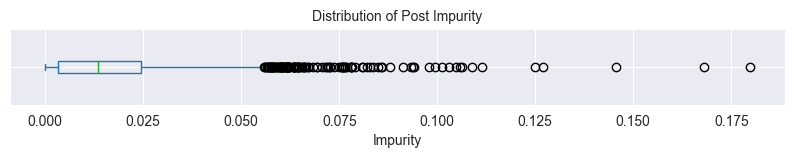

In [13]:
ax = df['impurity'].plot(kind='box', vert=False, figsize=(10, 1))
ax.set_title("Distribution of Post Impurity")
ax.set_xlabel("Impurity")
ax.set_yticklabels([])
ax;

In [14]:
df[['impurity', 'post', 'post_clean']].sort_values('impurity', ascending=False).head()

impurity  \
12357      0.18   
12754      0.17   
2730       0.15   
8700       0.13   
12522      0.12   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                post  \
12357  I'm looking to lease an a4 premium plus automatic with the nav package.<lb><lb>Vehicle Price:<tab><tab>$49,150.00<tab> <lb> <tab>AutoNation Savings:<tab>-<tab>$3,867.00<tab> <lb> <tab>AutoNation Price:<tab><tab>$45,283.00<tab> <lb> <tab> <tab> <lb> <tab>Sales Tax (estimate):<tab>+<tab>$2,734.98<tab> <lb> <tab>Title Fee:<tab>+<tab>$100.00<tab> <lb> <tab>Tire/Battery/MVWEA:<tab>+<tab>$4.00<tab> <lb> <tab>Tag/Registration Fees (estimate):<tab>+<tab>$207.00<tab> <lb> <tab>Electronic Filing:<tab>+<tab>$20.00<tab> <lb> <tab>Other:<tab>+<tab>$20.00<tab> <lb> <tab>Documentation Fee:<tab>+<tab>$300.00<tab> <lb> <tab>Balance Due (estimate):<tab><tab>$48,668.98<tab> <tab>No Trade-In<lb><lb>LEASE OPTIONS<lb>Cash Due<tab>36 months <tab>42 months <lb><lb>$2,000 <tab>$723<tab>$690<lb>$4,000 <tab>$663<tab>$639<lb>$6,000 <tab>$603<tab>$587<lb><lb><lb>This is my first lease, do these numbers look good? Should I push back or negotiate on anything?<lb><lb>Thanks!   
12754                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Bulbs Needed:<lb><lb><lb>**194 LED BULB x8**<lb><lb>4- DOORS<lb><lb>2- MAP LIGHTS<lb><lb>2- VANITY<lb><lb><lb>**3022 LED BULB x3**<lb><lb>2- CARGO DOOR<lb><lb>1- DOME LIGHT<lb><lb><lb>**BULBS USED:**<lb><lb>[194 LED BULBS](https://goo.gl/Jfu2Dx)<lb><lb>[3022 LED BULBS](https://goo.gl/fPgk6n)<lb><lb>[Trim Tools](https://goo.gl/hjxw8Z)<lb><lb>Parts list courtesy of [The Blue TRD](https://www.youtube.com/watch?v=CBJxfWdbEfo&amp;t=28s) from his You Tube Channel.<lb><lb>Just passing along the helpful info.   
2730                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Breakdown below:<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Manual Transmission<lb><lb>$19,350<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Automatic Transmission w/ SHIFTRONIC®<lb><lb>$20,350<lb><lb>Elantra GT Sport<lb><lb>1.6L Turbo GDI 4-cylinder<lb><lb>6-speed Manual Transmission<lb><lb>$23,250<lb><lb>Elantra GT Sport<lb><lb>1.6L Turbo GDI 4-cylinder<lb><lb>7-speed EcoShift® Dual Clutch Transmission w/ SHIFTRONIC®<lb><lb>$24,350   
8700                

In [15]:
df['language'].value_counts(ascending=False)

English    4996
Name: language, dtype: int64

In [16]:
df['subreddit'].value_counts(ascending=False)

Lexus                 266
Hyundai               263
Trucks                262
Honda                 261
MPSelectMiniOwners    260
mercedes_benz         259
mazda3                257
Harley                255
volt                  252
Volkswagen            252
Audi                  252
teslamotors           250
Volvo                 249
Mustang               248
BMW                   239
saab                  239
4Runner               238
Porsche               236
subaru                233
Wrangler              229
Name: subreddit, dtype: int64

Explore idiosyncrasies of various columns, e.g. same speaker represented multiple ways.

---

## Explore Text Column|

### Top Words Used

In [68]:
remove_tokens = {'_number_', 'car'}
count_tokens(df['lemmas'], remove_tokens=remove_tokens).head(10)

frequency
token           
look        2778
like        2355
drive       1879
know        1818
get         1750
new         1737
want        1688
go          1559
buy         1554
thank       1507

---

### Distribution of Text Length

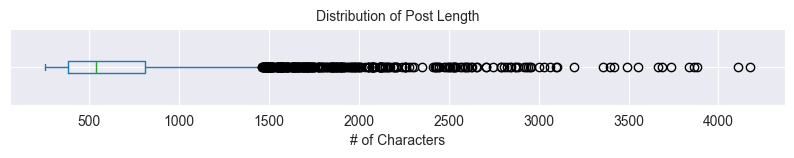

In [19]:
ax = df['post_length'].plot(kind='box', vert=False, figsize=(10, 1))
ax.set_title("Distribution of Post Length")
ax.set_xlabel("# of Characters")
ax.set_yticklabels([])
ax;

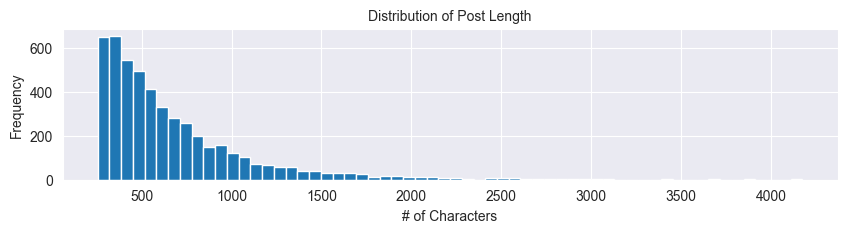

In [20]:
ax = df['post_length'].plot(kind='hist', bins=60, figsize=(10, 2));
ax.set_title("Distribution of Post Length")
ax.set_xlabel("# of Characters")
ax;

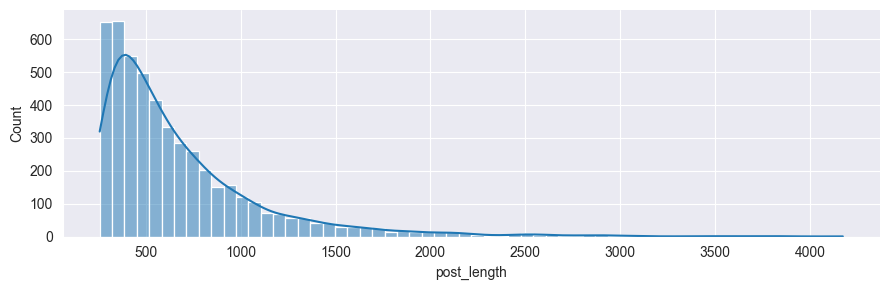

In [21]:
import seaborn as sns
sns.displot(df['post_length'], bins=60, kde=True, height=3, aspect=3);

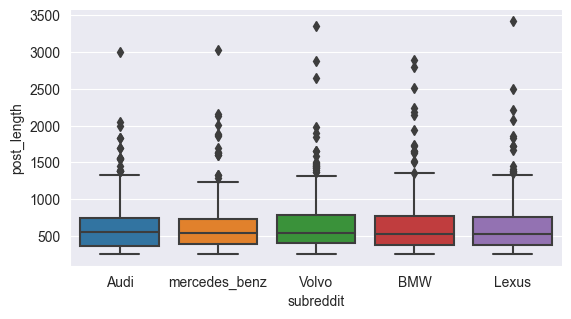

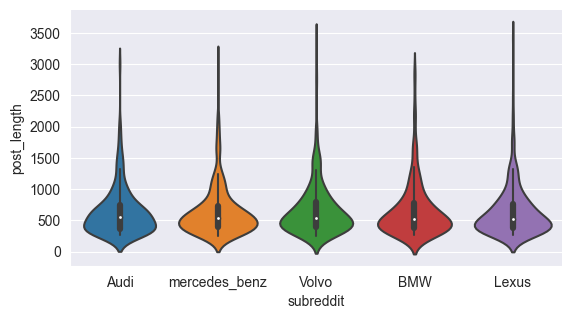

In [22]:
where = df['subreddit'].isin([
    'Lexus', 
    'mercedes_benz',
    'Audi',
    'Volvo',
    'BMW',
])
g = sns.catplot(data=df[where], x="subreddit", y="post_length", kind='box')
g.fig.set_size_inches(6, 3)
g.fig.set_dpi(100)
g = sns.catplot(data=df[where], x="subreddit", y="post_length", kind='violin')
g.fig.set_size_inches(6, 3)
g.fig.set_dpi(100)

### Word Frequency

In [23]:
counts_df = count_tokens(df['lemmas'], remove_tokens=remove_tokens)

In [24]:
def plot_wordcloud(frequency_dict):
    wc = wordcloud.WordCloud(background_color='white',
        #colormap='RdYlGn',
        colormap='tab20b',
        width=round(hlp.plot.STANDARD_WIDTH*100),
        height=round(hlp.plot.STANDARD_HEIGHT*100),
        max_words = 200, max_font_size=150,
        random_state=42
    )
    wc.generate_from_frequencies(frequency_dict)

    fig, ax = plt.subplots(figsize=(hlp.plot.STANDARD_WIDTH, hlp.plot.STANDARD_HEIGHT))
    ax.imshow(wc, interpolation='bilinear')
    #plt.title("XXX")
    plt.axis('off')

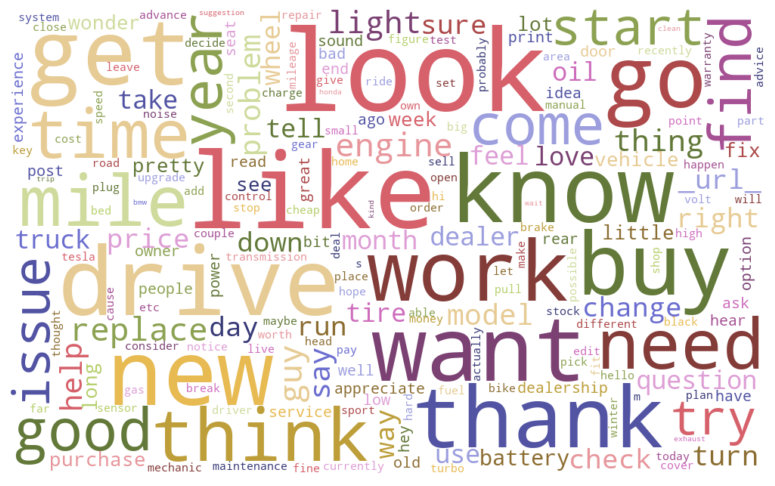

In [25]:
plot_wordcloud(counts_df.to_dict()['frequency']);

### TF-IDF

In [26]:
tf_idf_lemmas = tf_idf(
    df=df,
    tokens_column='lemmas',
    segment_columns = None,
    min_frequency_corpus=20,
    min_frequency_document=20,
    remove_tokens=remove_tokens,
)
tf_idf_lemmas.head()

frequency  tf-idf
token                   
look        2778 3045.85
drive       1879 2878.87
like        2355 2830.75
new         1737 2576.14
mile        1409 2513.88

In [69]:
remove_tokens_bi_grams = {'_number_ year', '_number_ _number_', 'hey guy'}
tf_idf_bi_grams = tf_idf(
    df=df,
    tokens_column='bi_grams',
    segment_columns = None,
    min_frequency_corpus=20,
    min_frequency_document=20,
    remove_tokens=remove_tokens_bi_grams,
)
tf_idf_bi_grams.head()

frequency  tf-idf
token                            
$ _number_           1089 2366.46
_number_ mile         555 1421.03
look like             229  749.94
_number_ month        194  675.39
test drive            187  668.29

In [46]:
tf_idf_nouns = tf_idf(
    df=df,
    tokens_column='nouns',
    segment_columns = None,
    min_frequency_corpus=20,
    min_frequency_document=20,
    remove_tokens=remove_tokens,
)
tf_idf_nouns.head()

frequency  tf-idf
token                    
mile         1409 2513.88
issue        1143 2242.28
year         1229 2227.66
time         1290 2216.84
engine        946 2103.53

In [47]:
tf_idf_noun_phrases = tf_idf(
    df=df,
    tokens_column='noun_phrases',
    segment_columns = None,
    min_frequency_corpus=20,
    min_frequency_document=20,
    remove_tokens=remove_tokens_bi_grams,
)
tf_idf_noun_phrases.head()

frequency  tf-idf
token                            
_number_ mile         486 1293.42
_number_ %            215  761.53
_number_ month        146  544.12
oil change            134  520.05
new car               130  502.27

---

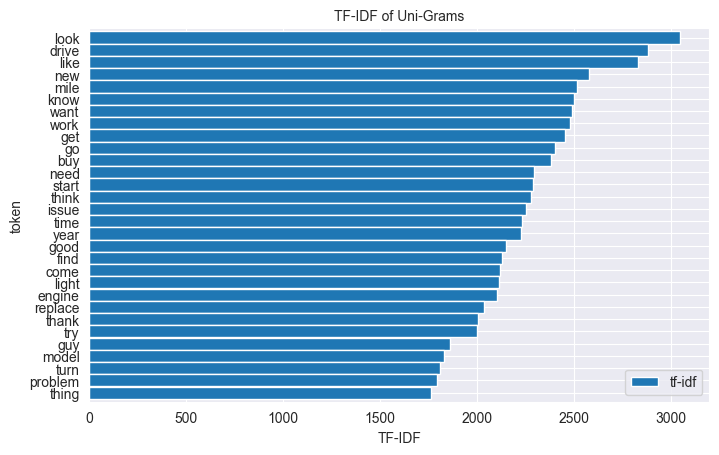

In [44]:
ax = tf_idf_lemmas.head(30)[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Uni-Grams")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

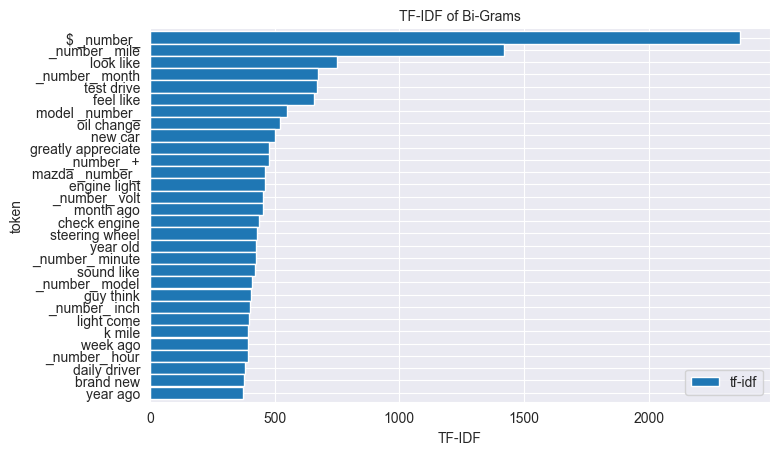

In [37]:
ax = tf_idf_bi_grams.head(30)[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Bi-Grams")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

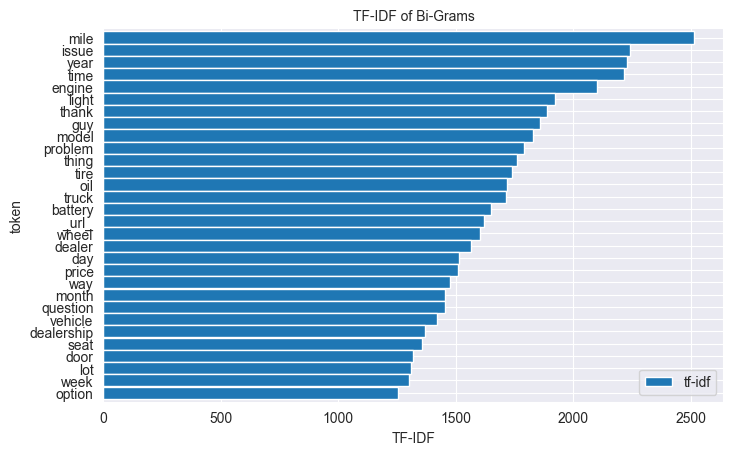

In [48]:
ax = tf_idf_nouns.head(30)[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Bi-Grams")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

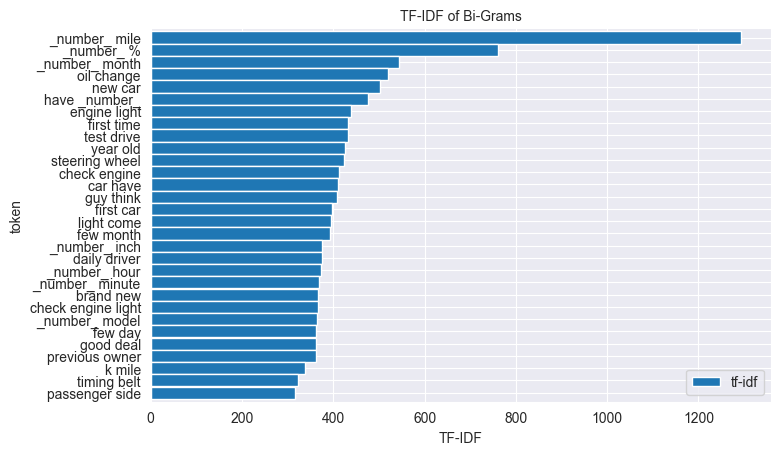

In [49]:
ax = tf_idf_noun_phrases.head(30)[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Bi-Grams")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

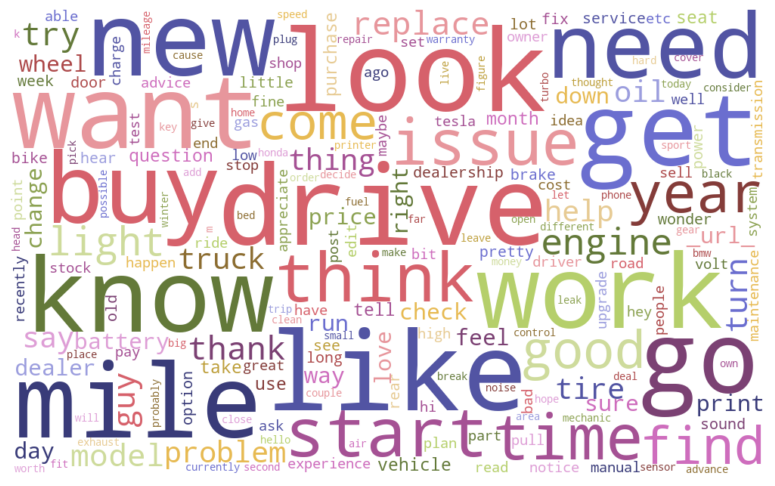

In [39]:
plot_wordcloud(tf_idf_lemmas.to_dict()['tf-idf']);

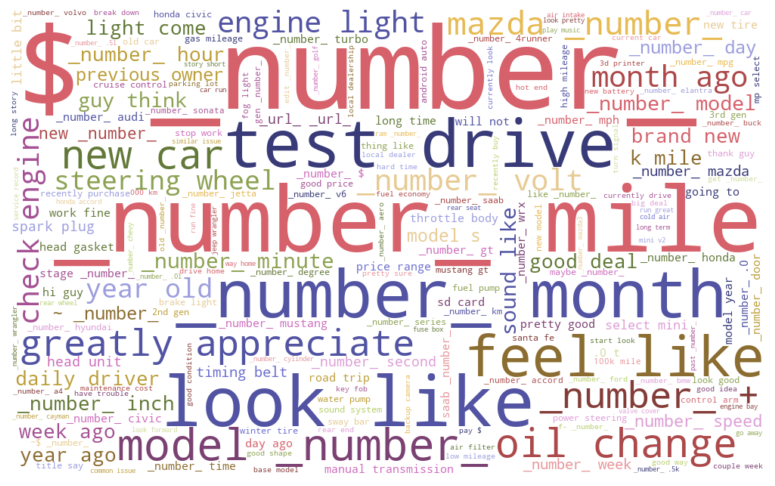

In [40]:
plot_wordcloud(tf_idf_bi_grams.to_dict()['tf-idf']);

#### By Subreddit

In [65]:
remove_tokens_subreddit = set(df.subreddit.str.lower().unique())
remove_tokens_subreddit

{'4runner',
 'audi',
 'bmw',
 'harley',
 'honda',
 'hyundai',
 'lexus',
 'mazda3',
 'mercedes_benz',
 'mpselectminiowners',
 'mustang',
 'porsche',
 'saab',
 'subaru',
 'teslamotors',
 'trucks',
 'volkswagen',
 'volt',
 'volvo',
 'wrangler'}

In [73]:
tf_idf_lemmas_per_sub = tf_idf(
    df=df,
    tokens_column='lemmas',
    segment_columns = 'subreddit',
    min_frequency_corpus=10,
    min_frequency_document=10,
    remove_tokens=remove_tokens | remove_tokens_subreddit 
)
tf_idf_lemmas_per_sub.head(5)

frequency  tf-idf
subreddit token                   
4Runner   gen           74  283.40
          sr5           50  241.65
          lift          57  215.51
          rear          61  171.54
          look         149  163.37

In [110]:
tf_idf_bigrams_per_sub = tf_idf(
    df=df,
    tokens_column='bi_grams',
    segment_columns = 'subreddit',
    min_frequency_corpus=10,
    min_frequency_document=10,
    remove_tokens=remove_tokens_bi_grams
)
tf_idf_bigrams_per_sub.head(5)

frequency  tf-idf
subreddit token                              
4Runner   _number_ 4runner         41  201.05
          3rd gen                  27  138.26
          $ _number_               60  130.38
          _number_ sr5             23  129.29
          4th gen                  15   90.78

In [78]:
tf_idf_nouns_per_sub = tf_idf(
    df=df,
    tokens_column='nouns',
    segment_columns = 'subreddit',
    min_frequency_corpus=10,
    min_frequency_document=10,
    remove_tokens=remove_tokens | remove_tokens_subreddit
)
tf_idf_nouns_per_sub.head(5)

frequency  tf-idf
subreddit token                   
4Runner   gen           73  280.18
          sr5           50  241.65
          lift          49  203.98
          mile          82  146.30
          trd           26  144.89

In [79]:
tf_idf_nounphrases_per_sub = tf_idf(
    df=df,
    tokens_column='noun_phrases',
    segment_columns = 'subreddit',
    min_frequency_corpus=10,
    min_frequency_document=10,
    remove_tokens=remove_tokens_bi_grams
)
tf_idf_nounphrases_per_sub.head(5)

frequency  tf-idf
subreddit token                              
4Runner   _number_ 4runner         23  126.08
          _number_ sr5             14   85.85
          _number_ mile            26   69.20
          sway bar                 12   66.87
          _number_ inch            13   58.16

---

In [83]:
tokens_to_show = tf_idf_lemmas_per_sub.query("subreddit in ['Lexus', 'Volvo']").reset_index()
tokens_to_show.head()

subreddit  token  frequency  tf-idf
0     Lexus  is350         37  198.29
1     Lexus   look        166  182.01
2     Lexus   mile        102  181.98
3     Lexus     gs         30  160.77
4     Lexus  drive        102  156.28

In [84]:
px.bar(
    tokens_to_show.groupby(['subreddit']).head(20).sort_values('tf-idf', ascending=True),
    x='tf-idf',
    y='token',
    color='subreddit',
    barmode='group',
    title="Top 20 Lemmas for Volvo & Lexus"
)

In [111]:
tokens_to_show = tf_idf_bigrams_per_sub.query("subreddit in ['Lexus', 'Volvo']").reset_index()
tokens_to_show.head()

subreddit           token  frequency  tf-idf
0     Lexus      $ _number_         54  117.35
1     Lexus  _number_ lexus         19  105.00
2     Lexus         f sport         16   94.55
3     Lexus  _number_ is250         13   82.09
4     Lexus     es _number_         13   80.85

In [112]:
px.bar(
    tokens_to_show.groupby(['subreddit']).head(20).sort_values('tf-idf', ascending=True),
    x='tf-idf',
    y='token',
    color='subreddit',
    barmode='group',
    title="Top 20 Bi-Grams for Volvo & Lexus"
)

---

In [88]:
get_context_from_keyword(df.query("subreddit == 'Lexus'")['post'], keyword='think')

[' I can run the check.<lb><lb>2.  I  |think|  the previous owner operated under ',
 'better on stock or ML? Currently i  |think|  the stock sound system is fine. Th',
 "ead of just replacing the bulb I'm  |think| ing of just getting some new headli",
 "e an NX F-sport pretty soon, and I  |think|  I've got a pretty decent deal, but",
 "e on the 2005-2006 year. I am also  |think| ing about the GS. since I'm assumin",
 ' is it just me or does anyone else  |think|  Lexus is lowering their prices? I ',
 'ost on a Volvo forum which made me  |think|  of this...<lb><lb>My last vehicle ',
 'to Audi). <lb><lb>Does anyone else  |think|  Lexus is gradually lowering their ',
 'arily right before selling. Do you  |think|  I bought a car with a defective le',
 "need to buy to do this myself? I'm  |think| ing I need the following:<lb><lb>- "]

In [89]:
get_context_from_keyword(df.query("subreddit == 'Volvo'")['post'], keyword='think')

["f.<lb><lb>My question is - I don't  |think|  the sway bar is the cause for the ",
 "As the title asks, I'm  |think| ing about buying a 2010 C30 R-Desig",
 'ndering what you Volvo aficionados  |think| ! Also, this is my ideal trim and c',
 "il Change and to read codes. Can't  |think|  of the exact mileage right now but",
 "is true when I see it in person, I  |think|  I'm OK buying it with the knowledg",
 "nt to back, with the seats down. I  |think|  any 240 model will meet this. I'm ",
 "mes on.  I try to stay positive by  |think| ing maybe my mechanic didn't top me",
 "So I'm  |think| ing about buying this old S80 T6 fo",
 'these in my country and so i might  |think|  of importing one, but the problem ',
 "I'm  |think| ing of buying a 2000 V70 XC with 14"]

##### Lexus

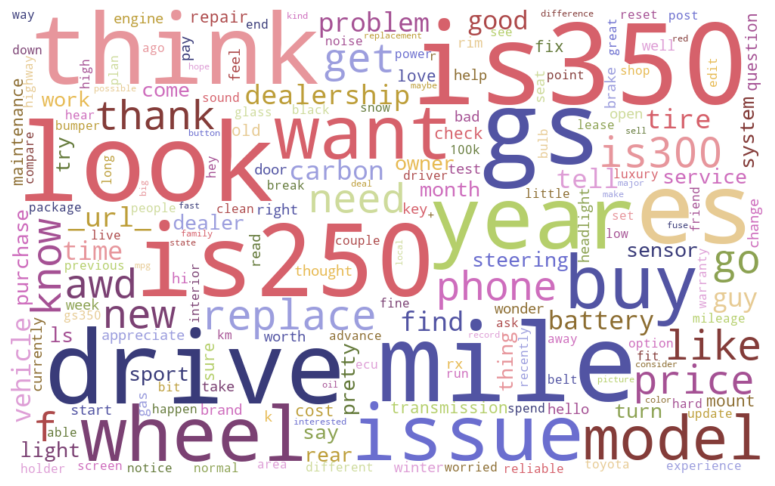

In [102]:
tokens_to_show = tf_idf_lemmas_per_sub.query("subreddit == 'Lexus'").reset_index()
#tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']
plot_wordcloud(tokens_to_show);

##### Volvo

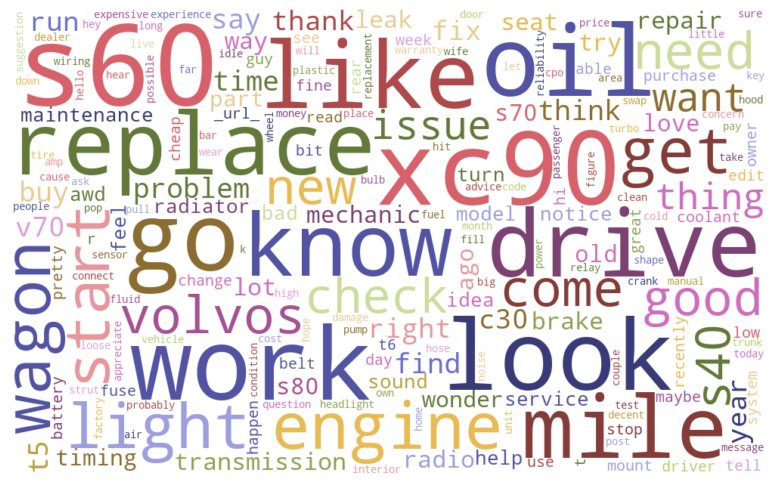

In [103]:
tokens_to_show = tf_idf_lemmas_per_sub.query("subreddit == 'Volvo'").reset_index()
#tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']
plot_wordcloud(tokens_to_show);

### Keywords in Context

In [104]:
contexts = get_context_from_keyword(
    documents=df['post'],
    window_width=50,
    keyword='replac',
    num_samples = 20,
    random_seed=42
)
for x in contexts:
    print(x)

rger.<lb>* My Elantra still runs great and I just  |replac| ed the tires.<lb>* The financials are all there, b
 for a while, but now the time has come for me to  |replac| e my coil springs. I had heard great things about 
I'm  |replac| ing the radio with a Pioneer AVH-X2800BS in my '04
<lb><lb>I sent it back to PA Performance and they  |replac| ed all the internals. While I was waiting on PA Pe
 Also, the battery in the car seems like it needs  |replac| ing as the interior lights flicker and the car has
ere can confirm that before I go digging deep for  |replac| ement panels. Thanks!
and my steering stabilizer is shot.  Do I need to  |replac| e it to keep my tires healthy or not?  I really do
nyone knows the type of them? Or where can i find  |replac| ements? I will add pictures, the small one is from
 is having some problems so that might need to be  |replac| ed. Could that explain the floatiness? <lb><lb>Als
<lb>The coolant reservoir tank seems to have been  |replac| ed, I heard it's

---